<a href="https://colab.research.google.com/github/noa-blenkitny/IR_Project/blob/main/search_backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Authenticate your user
# The authentication should be done with the email connected to your GCP account
from google.colab import auth
auth.authenticate_user()

In [2]:
# Copy one wikidumps files 
import os
from pathlib import Path
from google.colab import auth

project_id = 'core-period-321814'
!gcloud config set project {project_id}

data_bucket_name = 'wikidata_preprocessed'
try:
    if os.environ["wikidata_preprocessed"] is not None:
        pass  
except:
      !mkdir wikidumps
      !gsutil cp gs://{data_bucket_name}/multistream1_preprocessed.parquet "wikidumps/" 

Updated property [core/project].
mkdir: cannot create directory ‘wikidumps’: File exists
Copying gs://wikidata_preprocessed/multistream1_preprocessed.parquet...
/ [1 files][316.7 MiB/316.7 MiB]                                                
Operation completed over 1 objects/316.7 MiB.                                    


In [3]:
!pip install -q pyspark
!pip install -U -q PyDrive
!apt-get update -qq
!apt install openjdk-8-jdk-headless -qq
!pip install -q graphframes
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
graphframes_jar = 'https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar'
spark_jars = '/usr/local/lib/python3.7/dist-packages/pyspark/jars'
!wget -N -P $spark_jars $graphframes_jar
import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.ml.feature import Tokenizer, RegexTokenizer
from graphframes import *
# Initializing spark context
# create a spark context and session
conf = SparkConf().set("spark.ui.port", "4050")
#sc.stop()
sc = pyspark.SparkContext(conf=conf)
sc.addPyFile(str(Path(spark_jars) / Path(graphframes_jar).name))
spark = SparkSession.builder.getOrCreate()

openjdk-8-jdk-headless is already the newest version (8u312-b07-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 100 not upgraded.
--2022-01-04 08:27:19--  https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
Resolving repos.spark-packages.org (repos.spark-packages.org)... 65.9.83.119, 65.9.83.8, 65.9.83.20, ...
Connecting to repos.spark-packages.org (repos.spark-packages.org)|65.9.83.119|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘/usr/local/lib/python3.7/dist-packages/pyspark/jars/graphframes-0.8.2-spark3.2-s_2.12.jar’ not modified on server. Omitting download.



In [4]:
#when we move to gcp- nedd to change it to the entire wikipdia corpus
from pathlib import Path 
import os

try:
    if os.environ["wikidata_preprocessed"] is not None:
      path = os.environ["wikidata_preprocessed"]+"/wikidumps/*"
except:
      path = "wikidumps/*"

parquetFile = spark.read.parquet(path)
parquetFile.count()

21084

**bulding our test rdds**

In [5]:
docs_list = [23862, 23329, 53672527, 21356332, 4920126, 5250192, 819149, 46448252, 83036, 88595, 18942, 696712, 2032271, 1984246, 5204237, 645111, 18384111, 3673376, 25061839, 271890, 226402, 2380213, 1179348, 15586616, 50278739, 19701, 3596573, 4225907, 19160, 1235986, 6908561, 3594951, 18805500, 5087621, 25049240, 2432299, 381782, 9603954, 390263, 317752, 38007831, 2564605, 13370873, 2403126, 17402165, 23678545, 7837468, 23954341, 11505904, 196698, 34292335, 52042, 2247376, 15858, 11322015, 13062829, 38833779, 7800160, 24193668, 440018, 54351136, 28887886, 19620, 23045823, 43003632, 746577, 1211612, 8305253, 14985517, 30796675, 51800, 964717, 6146589, 13024, 11583987, 57294217, 27471338, 5479462,35458904, 2720954, 54415758, 233488, 12487489, 48364486, 487132, 416589, 27051151, 66414222, 18985040, 4141563, 376707, 67092078, 61624594, 59591015, 49681, 55052729, 31663650, 35757264, 63995662, 3461736, 56499662, 43003632, 26685, 10147369, 24932989, 66982525, 5323, 46207323, 8495, 31915311, 51552534, 64057049, 45443335, 37849704, 42149032, 63198823, 38833779, 26880450, 39171985, 5213, 44133735, 28486111, 48972018, 23943140, 17740009, 49954680, 28326718, 63016369, 56023027, 58731, 55207134, 62798611, 65732625, 58255666, 68181697, 47892671, 1309220, 65499427, 58255600, 47638279, 46626475, 46374359, 53343108, 173332, 7671, 18745015, 50565707, 57143357, 45112545, 63148404, 50533783, 51112472, 49281083, 51505979, 1181008, 56731447, 59116880, 51578025, 21462612, 1765779, 39675445, 42253,21035, 36984150, 2702930, 25045060, 24224679, 2555865, 36579642, 310429, 22352499, 11495285, 22294424, 234876, 40748148, 69893, 61962436, 62871079, 843361, 7362700, 16982268, 15712244, 5690287, 7362738, 600236, 12410589, 26584776, 3332410, 20038918, 739855, 1015919, 14201682, 24361010, 53035710, 22901459, 57672434, 4206029, 738384, 36579839, 188521, 15325435, 3602651, 40428462, 322197, 19592340, 3868233, 2385806, 2933438, 23174077, 14001660, 2425344, 288328, 21381229, 26585811, 12652799, 322210, 51078678, 621531, 685130, 11193835, 21197980, 21078348, 3108484, 692988, 31556991, 18741438, 3053003, 50977642, 55115883, 17208913, 64269900, 54077917, 36666029, 50083054, 28245491, 5692662, 18353587, 1994895, 21364162, 20208066, 38574433, 910244, 6154091, 67754025, 2132969, 61386909, 18600765, 579516, 7089, 6693851, 6672660, 23159504, 49770662, 167891, 2399742, 100710, 76723, 5290678, 54229, 3881415, 3720007, 32652613, 1471058, 5239060, 1421165, 1730071, 1277918, 7419133, 17720623, 1765026, 19079925, 1979873, 497794, 57947, 15007729, 85655, 4250574, 2386481, 228541, 55225594, 318873, 22631033, 27767967, 7061714, 8175846, 3881265, 3046256, 606737, 845137, 16161419, 3098266, 54573, 11323402, 936243, 39280615, 13687674, 47155656, 7151675, 43627595, 26879832, 43098662, 2333593, 349448, 2052211, 4432842, 56412300, 1411016, 2152015, 3502051, 33372192, 61422444, 2385217, 1217747, 24315397, 7082459, 856246, 6050655, 27162455, 52140446, 37243595, 36961531, 245067, 1148978, 1770825, 976322, 10300434, 7249348, 14945749, 62851606, 637004, 16224368, 18509922, 25659792, 50404581, 29178, 3080697, 90267, 2568868, 3450096, 49647732, 462173, 43911472, 20229, 40478583, 56643734, 21257512, 2387344, 59405867, 1330188, 12638661, 501757, 446865, 4468939, 25215235, 456363, 95411, 30916, 53487581, 30876926, 301932, 47764842, 426522, 579040, 54155622, 60535326, 23852947, 4275382, 67279077, 16591942, 334546, 602599, 3735620, 10296674, 858120, 30876121, 443480, 1038309, 50653758, 2258995, 34121672, 5382150, 884056, 3141956, 349722, 6745, 3511512, 35211682, 611752, 66963891, 43977806, 36742560, 2899729, 5413930, 61742595, 6972293, 14926, 42674415, 193957, 1950442, 3396753, 2269888, 40055348, 63609800, 1343426, 26078050, 44808, 42444204, 35034191, 9303405, 4627535, 59407816, 28732, 1187122, 6984468, 3328852, 56313776, 43853813, 3533082, 1032674, 39797382, 8892877, 50404581, 301932, 30876121, 12727781, 37018026, 382599, 56232, 1032674, 202437, 9759063, 2047222, 11309920, 15015154, 46482, 406363, 39813131, 9785087, 47840259, 230716, 2240648, 49380722, 62153, 64083, 5355, 1330224, 17345999, 36969, 50577743, 31919750, 1197035, 2175, 15003673, 54145741, 42801, 458008, 47150650, 67922, 39390739, 901091, 28771786, 6984468, 416752, 382619, 198153, 49065540, 496821, 3112548, 15434651, 237489, 47862672, 915309, 708662, 21699434, 550448, 22893145, 17055183, 32863238, 13824676, 1300923, 746225, 33065713, 47770304, 32593, 11002, 20156275, 22735258, 31156754, 32587, 2077960, 344611, 5652480, 31425310, 991758, 40956516, 594987, 1093416, 26473291, 877461, 340356, 13679, 1558639, 11832915, 926863, 14953848, 42155809, 54923, 276975, 66554, 5775715, 3133549, 1104286, 26951370, 3240723, 6523448, 3902658, 44674524, 1092923, 12431, 224584, 43419164, 9874319, 4338696, 3190097, 9651444, 33321947, 26334893, 1497849, 47489893, 32639051, 2030607, 60903, 19133401, 42411494, 47799755, 4028754, 42960975, 24386465, 5339378, 1494648, 14181749, 58582001, 10062721, 33039125, 286747, 48736239, 33367993, 50575063, 55633178, 29403992, 34113322, 3660182, 25173473, 62438513, 60904, 3235536, 40867519, 5376827, 44424763, 58708106, 64302888, 187946, 29156200, 46426771, 35847782, 5376796, 25295524, 33768164, 46551547, 773423, 5376868, 49931371, 59539691, 22411575, 35326347, 46493906, 11451897, 10619416, 36891093, 40116717, 23533163, 879962, 502593, 3371574, 43194901, 41815118, 35673556, 6575642, 43997189, 5913182, 2126501, 52840911, 1566175, 42951365, 42694174, 22992426, 466299, 736238, 7301470, 1431181, 48653985, 51328172, 12003767, 15271, 494530, 442684, 19988623, 731640, 24997830, 10179411, 16635934, 33407925, 11486091, 50716473, 35804330, 18550455, 21106742, 4694434, 26591446, 296950, 24963841, 346470, 509628, 261193, 28688670, 10218640, 1897206, 39000674, 17785794, 38156944, 9586885, 743971, 1185840, 7872152, 10328235, 36794719, 509624, 5818361, 25935906, 22254915, 4881262, 39585214, 30882491, 57312392, 3781784, 25959000, 14109784, 10818378, 25957127, 9511414, 6422823, 20289869, 15101979, 48317971, 14343887, 762092, 4840292, 25130414, 7602386, 37131566, 6118940, 56598843, 11184711, 1315248, 12101316, 22809006, 29979321, 149354, 32817039, 25271852, 20948989, 36749242, 26143506, 19542049, 360030, 20632884, 24963451, 30874683, 11647367, 383162, 13200719, 1981660, 53123104, 10715937, 24019253, 25050663, 27511028, 1514191, 22093, 16795291, 65166616, 65785063, 835946, 890793, 3921, 450389, 20455, 987153, 240940, 246185, 9000355, 5608488, 3280233, 3505049, 5958023, 72852, 8806795, 1811390, 2423824, 516570, 15392541, 72893, 412214, 278018, 12106552, 42846434, 12754503, 9807715, 4108839, 33328593, 64063961, 7215125, 1811320, 1111137, 5035602, 60483582, 9397801, 255645, 16899, 43376, 72855, 65785040, 72866, 6215230, 4987149, 72878, 16160954, 243389, 64639133, 38958735, 72858, 27196905, 38153033, 1385825, 9733533, 49926096, 4875689, 4750398, 28754077, 43569250, 22092, 72889, 59798759, 49778089, 346029, 8588996, 1956255, 52454088, 25390847, 31667631, 878666, 48695845, 72857, 459304, 27837030, 17107550, 72861, 54859596, 9195892, 6560301, 72875, 72883, 240989, 3196517, 24612090, 34258, 59580357, 315141, 47035547, 626718, 32016617, 59516988, 61583621, 38424, 196789, 734272, 60851303, 988753, 92222, 419015, 60992198, 621809, 83742, 3127300, 23834216, 1381751, 744158, 18911094, 1817874, 59052395, 43562594, 31793047, 6154795, 17452177, 62342792, 13936750, 60805249, 60823333, 59899027, 46719542, 7702313, 60310807, 44270128, 68489731, 60500106, 1652601, 359983, 60300514, 45482242, 34756533, 58520592, 43611227, 47586513, 1775374, 6933106, 13412771, 62549131, 49278248, 62557135, 4523354, 60468426, 666420, 1017009, 35795560, 34843274, 60199413, 16488467, 29828807, 585681, 41757168, 66018807, 61285582, 1226448, 28848113, 11487904, 4242777, 1661867, 10671559, 44035836, 6931929, 60705564, 61690747, 7343803, 9042644, 36991237, 3965223, 63090179, 632990, 1041815, 53087254, 418999, 1632919, 952429, 53916, 4189740, 5132315, 5818788, 35270055, 246674, 28271176, 18952739, 13323241, 1257003, 39562449, 11286, 1440567, 294295, 718110, 5806056, 3587235, 515758, 70129, 11984, 25228985, 1572831, 28125449, 1101651, 8220315, 149463, 63883178, 43937, 432174, 55775421, 2413296, 54019, 1878531, 57559, 1822951, 44568, 10104316, 16671094, 59988, 2068329, 12174150, 18952424, 48340, 83024, 99951, 4390795, 4954263, 3012923, 43344741, 61932070, 1480987, 2520434, 15880608, 7852272, 33084611, 27377596, 57866, 22438472, 8150951, 1265113, 19828134, 76046, 37774, 9270823, 1421709, 2051423, 7173874, 59400, 3606300, 8846, 38980932, 427577, 589513, 147484, 3883838, 29565262, 1527015, 533214, 10669865, 32591, 992052, 4975851, 44629591, 162296, 3513027, 11921706, 9041235, 1068768, 5498413, 591668, 42586177, 1185479, 514894, 3419, 14174833, 71265, 7218230, 63631542, 821829, 633458, 63567907, 14208718, 7912947, 159546, 67759831, 7439323, 64192678, 40909056, 5322079, 63164437, 31728348, 12772, 1402997, 1156703, 1840653, 568164, 1814699, 2945076, 2565663, 442333, 33567480, 468313, 19718702, 987724, 903187, 1485962, 5003908, 4201044, 28086000, 28844729, 1265651, 4659608, 64966775, 55960921, 8970797, 4301719, 35892659, 2248622, 6939163, 48561519, 261396, 34298473, 12263290, 44258772, 25219375, 149426, 6558203, 46567337, 46784964, 6458321, 46576311, 18823362, 48315099, 56440599, 57159776, 74910, 67891964, 1702593, 560306, 1015304, 705756, 7479199, 57772096, 58946599, 1210300, 15716827, 34336876, 9040490, 439102, 264104, 11061915, 39774839, 34735506, 42174581, 66859257, 3293969, 16315, 23166476, 42812440, 66935753, 51990351, 36619752, 59863622, 38404, 64027932, 366477, 21000624, 3252816, 29437250, 2399020, 2675881, 360797, 184979, 20775117, 3233153, 31185151, 67528700, 31265743, 31526583, 157649, 60421513, 58847654, 360789, 5089316, 37168, 29772915, 29448480, 63351334, 3136619, 8076709, 41047099, 48658625, 50394170, 2621344, 25496814, 2997690, 41956157, 8817935, 19283335, 3738164, 60383204, 29449433, 20302560, 664951, 580517, 21434255, 8304348, 21611071, 55449550, 27555169, 28153175, 39614564, 314544, 31102405, 1428872, 19952476, 59540110, 40704884, 193714, 8948452, 49891754, 24008586, 32047012, 1104969, 54632, 31323977, 28253219, 33538385, 177671, 3286723, 16368206, 25351191, 5549127, 184959, 52708523, 728321, 31186864, 57685061, 240148, 22067678, 20827796, 4681, 41958461, 150389, 412643, 48475515, 2775579, 4489, 997303, 250247, 311440, 42669424, 1080173, 2295417, 1243208, 1045845, 1890951, 4668823, 1027896, 7364325, 6613094, 8001012, 45079706, 580715, 5866454, 6383976, 18611260, 28643, 2581217, 5686025, 49998617, 63011479, 54736719, 20913864, 52146943, 34900078, 756765, 344269, 254067, 10916, 1764686, 25211041, 28456222, 35334391, 3845894, 34354998, 403653, 46745914, 11415141, 2252455, 283858, 65217527, 3223727, 42549636, 22546, 581077, 7971671, 21496150, 1104090, 21496038, 12082283, 24385806, 575890, 7105280, 54863336, 36164, 1752731, 3611109, 106121, 50364362, 3039817, 38041, 2968175, 70547, 13502823, 36881878, 702635, 18838, 15179951, 286455, 7139331, 218406, 1130867, 21490868, 1025265, 498971, 12915125, 4819795, 49458922, 23446323, 1244458, 599738, 21905962, 39322520, 2608233, 12234103, 6264793, 6497307, 39303262, 54655786, 3378227, 64516, 41300601, 27898480, 672302, 1793236, 1765938, 1179787, 22503790, 43399069, 6263016, 31468446, 23030371, 1540241, 38904159, 11882165, 43707, 54406331, 3275717, 3781845, 57228339, 312903, 16308445, 8277225, 864249, 3115732, 15190087, 2541491, 1923274, 37400147, 47987665, 978408, 36835927, 2589070, 559356, 19696772, 17069844, 13315204, 34829413, 23454546, 2045055, 311935, 37674, 582735, 52077192, 4463369, 11760348, 2036409, 79732, 35052231, 644781, 50991931, 51729995, 56721897, 60583278, 4512778, 53866975, 31728660, 636344, 48286897, 2550824, 66591573, 1360573, 52882803, 1761526, 56758995, 52971602, 2575380, 59519477, 1343949, 53748793, 66029904, 17284321, 62380392, 8250222, 1044117, 37032671, 51478870, 11216001, 2947322, 60085976, 1291991, 9483388, 11231759, 22513329, 5046302, 35927164, 43610835, 2074655, 52076814, 66846904, 58067594, 3997367, 9547083, 16348889, 16184595, 44972706, 37026554, 36753304, 65601792, 66605355, 34964813, 10873990, 13235623, 46302846, 37297021, 3463398, 32739936, 2337323, 55840499, 40475635, 48308444, 65766671, 175537, 7235116, 164376, 42262371, 60883, 53066659, 989858, 302808, 37331423, 18948312, 4552880, 13612929, 55864774, 35729649, 1350109, 52766120, 147143, 55411770, 6920292, 38539, 29831, 23776, 20840, 50276487, 3470969, 59480957, 617668, 33279717, 63704575, 65693607, 57944031, 27306717, 1732642, 32255505, 37061023, 43379979, 19508643, 58150649, 2381862, 21899417, 40438099, 40030145, 6405787, 504230, 925736, 60446377, 37669357, 44146329, 54647064, 66938917, 64704775, 169672, 40867822, 5230872, 66259016, 67736156, 13690215, 342398, 57579192, 394697, 33757091, 55825336, 1068736, 2009711, 47778072, 41451023, 35306910, 31607, 56789255, 18383702, 1492414, 37901793, 2650227, 7152087, 60587209, 818234, 66814247, 59800766, 2387993, 66255918, 63241742, 4765530, 27375211, 21863425, 618856, 57069491, 65967176, 42163310, 878659, 27306717, 41677925, 1074657, 44240443, 17296107, 60952488, 43603241, 22114132, 46208997, 36450985, 41974555, 56289672, 60616450, 59502488, 33038861, 61699239, 61651800, 39368416, 29129051, 55935213, 54537218, 62372638, 60774345, 63090183, 37497391, 51430647, 67229718, 9110929, 61329320, 44254295, 41974496, 200563, 58481694, 48530084, 56289572, 22144990, 612052, 59162931, 55511148, 55511147, 61073786, 59892, 36484005, 36484254, 66423851, 62482816, 1275470, 5676692, 7927053, 60754840, 26999426, 60744481, 56289553, 60463979, 701741, 60283633, 1129847, 36439749, 4451883, 55511155, 22144721, 45359871, 723126, 43655965, 57275457, 12673434, 43867095, 26763420, 39293265, 15003874, 41668588, 61592102, 67063919, 11891433, 64057670, 61513780, 39345917, 67063906, 1221476, 41008758, 60587000, 7729, 2152196, 5027882, 509738, 403585, 26866372, 1339248, 3473503, 4148655, 9232, 31655286, 4465969, 50230910, 35392555, 17664319, 548182, 148869, 34080, 64487, 12232, 38253534, 1278990, 705310, 1849140, 37882040, 305175, 41731654, 5486819, 38345627, 222491, 48534532, 61371, 5065635, 1273047, 881491, 40797848, 6788, 10000, 595149, 43617005, 64437720, 580320, 24001, 5052869, 5028853, 6112, 43825684, 22910214, 13338662, 16990777, 39902695, 7424280, 2040288, 3945278, 167585, 1632912, 13065408, 59917348, 27218900, 1884312, 4539416, 71899, 38342244, 308868, 12629761, 61402898, 19931851, 66273148, 384286, 5763069, 19437928, 8166922, 4649105, 1525546, 26775738, 671331, 2730731, 828085, 32623, 228190, 25311310, 1183972, 240668, 1808135, 10133081, 9917505, 297576, 10591, 5961225, 12897776, 4105482, 27944015, 7368588, 31591921, 431786, 64085, 12209015, 3342275, 21828, 42416319, 7082459, 48212, 529439, 7089, 704826, 228234, 225870, 3651805, 2837891, 976456, 3214240, 23054130, 54587, 8073864, 40783886, 48936348, 634940, 222266, 62149, 25342571, 167891, 241559, 4456418, 7778546, 50280699, 19886, 1188562, 249116, 6690, 35292743, 60862228, 3546873, 348499, 60088597, 113092, 180251, 7438610, 2668736, 55539, 849869, 3111871, 54840207, 64088, 2005216, 507776, 1124192, 304091, 49090939, 39727947, 1063168, 56069398, 84241, 1670565, 3631020, 566114, 1471058, 4979006, 1902624, 1613163, 654732, 937047, 16749463, 2142071, 30224834, 2208584, 34482422, 41580016, 2190209, 23139600, 24056098, 53469, 42416319, 30224834, 48212, 21828, 745000, 3342275, 23054130, 25311310, 2837891, 1124192, 978236, 1188562, 7082459, 47270314, 3651805, 2606761, 40783886, 34482422, 2298022, 6311077, 43334967, 24056098, 483473, 2190209, 11859370, 44309134, 17634819, 54595558, 39817115, 1889217, 897934, 2142071, 36906301, 1412877, 3644514, 42360671, 53354661, 22757645, 23114830, 2831887, 548336, 566114, 872876, 12209015, 42393261, 515436, 657055, 19558531, 8703840, 58534087, 50727159, 1532857, 362124, 40790752, 1092688, 5266044, 1531621, 37652572, 1207268, 1493164, 14342785, 7660130, 64594706, 2446518, 16969340, 20439501, 29538871, 18944151, 60888779, 33481262, 50498250, 430008, 2246339, 60395596, 6889129, 6974438, 298232, 1517154, 6159650, 491172, 2881613, 6719413, 38464202, 2881547, 609528, 435492, 30597745, 37469, 59024, 371327, 2078529, 8491563, 40536338, 37421, 40774543, 5118574, 2766942, 4673201, 2636347, 559339, 20327832, 17412253, 426315, 6060889, 2110221, 17566205, 529780, 337814, 5270659, 7273911, 249858, 32468394, 16887435, 903052, 4676317, 47419336, 49355, 1807656, 19960341, 44547, 7775525, 48253954, 29604056, 469664, 9066654, 8133498, 52281147, 24997576, 37454, 9952602, 16938429, 7154355, 22199452, 912227, 22549390, 1632324, 9675171, 8867983, 3294758, 57591892, 5563310, 2297090, 7718500, 35973111, 50795, 4553108, 4660251, 20323494, 3493102, 5302000, 3013373, 14438844, 498076, 8100167, 12356944, 4169317, 3664299, 801978, 42980570, 27833186, 17362858, 8957449, 13612149, 51895777, 60898024, 50683920, 42471422, 8983183, 63295665, 484030, 3206057, 1847385, 52412294, 31452088, 1012806, 59440349, 195809, 703758, 15037, 1279101, 2095532, 17418777, 805626, 6050003, 19390, 19776474, 11921, 4193788, 14754518, 21179478, 2732267, 2941963, 39217006, 2905253, 1946204, 3287760, 59872594, 39206, 63121, 234921, 48732, 19344654, 372478, 32843712, 4361873, 806538, 3524766, 2797868, 43601944, 48449792, 13051060, 45691897, 46526, 36662188, 142528, 19288592, 43250171, 42332846, 2213921, 56440839, 33680356, 529056, 32362461, 68186473, 51097615, 17519943, 4567010, 610452, 60739751, 19585449, 3528947, 846772, 59568301, 10554676, 2738057, 28026533, 26700112, 1549819, 35917094, 24593449, 30810141, 4992612, 57851653, 32400932, 18169326, 21549213, 57275912, 1118379, 57313961, 909036, 35356507, 4355398, 236424, 1719292, 52328, 1184796, 2002497, 1655005, 66355340, 650704, 42736966, 4730170, 41055774, 56081344, 2570959, 3322361, 818420, 36598455, 14684661, 9557957, 37989952, 46269496, 1943640, 46677020, 10782332, 52985524, 475952, 65366095, 13700748, 742316, 3923466, 4080953, 65176113, 8848402, 487090, 56833348, 64159270, 25613, 48253536, 14062336, 55536490, 53653129, 63327652, 43441237, 141013, 2612612, 4876011, 35237477, 64444618, 3057990, 50777038, 67071821, 56042524, 295993, 10827381, 356785, 1849681, 200734, 3188121, 25614, 2495537, 67924707, 42347365, 26952693, 6013, 42757076, 33637422, 60698570, 12210793, 40845811, 46613990, 56363941, 64784613, 22494577, 2794874, 1566357, 229236, 23213, 33178, 348111, 67162622, 40068424, 8094067, 1896889, 1999636, 1929338, 42469790, 19492975, 2009711, 18491946, 565318, 2199665, 2489613, 265033, 20874323, 3626050, 60534633, 23941708, 2103762, 16943307, 896634, 4055486, 1722156, 171581, 2509885, 2161511, 35107462, 19347339, 224220, 10669385, 142417, 2453923, 40075315, 2963622, 3746, 213251, 6837398, 23487440, 5083422, 1152328, 13280124, 27289304, 75222, 628467, 1249019, 36875530, 23388142, 422269, 263344, 1071462, 56099, 3653602, 1562284, 14384, 2052387, 2682907, 6009939, 672934, 272659, 2203853, 492540, 689763, 13383187, 17621896, 36310013, 17868447, 28240, 17461478, 149124, 13149, 859458, 49127538, 75290, 3178385, 6984004, 21944373, 3478140, 2080, 14573, 1673495, 11858188, 32158923, 30294906, 201525, 28327, 4800, 3188952, 4481567, 1660387, 524987, 44822802, 8571805, 9974017, 879000, 2108776, 10180504, 6245494, 1403888, 596078, 133574, 142049, 1858763, 36643850, 177541, 28239, 17255946, 99860, 66293350, 29066482, 924170, 85533, 994892, 1127534, 430980, 21491579, 667785, 382165, 1591777, 64210828, 479210, 1262999, 319703, 7209753, 12119521, 1857, 37179209, 70322, 630522, 30332, 41609161, 1236844, 22265206, 20071428, 318313, 7928434, 538393, 27363348, 907259, 699156, 33110953, 1833715, 79906, 6102876, 886827, 1125781, 55791, 20089569, 823320, 9457, 863306, 25767045, 29589, 70136, 23298, 925493, 5048642, 14650035, 59594788, 26726864, 925506, 480905, 1387946, 925740, 20072937, 1050340, 7959, 23269223, 64499620, 925728, 371301, 763947, 31664, 924141, 46023, 5372935, 57393329, 48870396, 315204, 23032578, 25908, 37593868, 871796, 64695698, 51582, 36968102, 8009590, 1516039, 7529001, 169131, 1435428, 24909346, 47350955, 13624574, 1141303, 33849881, 827717, 1442241, 7913597, 261709, 65028817, 60670913, 52647644, 1435365, 1125761, 5101133, 18745215, 9483388, 24615479, 12431, 37593992, 10448121, 6956596, 1497849, 286747, 59868408, 4465875, 8598331, 35673556, 27051151, 1360154, 47799755, 18968719, 44008170, 24213566, 54737654, 5339378, 187946, 26275110, 30853394, 12003767, 7043619, 67414554, 47615485, 32613098, 33367993, 34083096, 3609466, 49132107, 53356243, 28236187, 1027207, 47339470, 37779362, 37980517, 62705077, 41815118, 3524766, 37728339, 32158961, 1491100, 56313056, 3660182, 1762557, 9933471, 43959031, 38755390, 3067569, 28190146, 37670240, 100640, 269558, 1959777, 22670461, 67072363, 11971218, 34617580, 47775306, 47840375, 28827117, 11827767, 17031486, 11689293, 9526854, 11980851, 11971397, 47806602, 11266183, 4992439, 47775348, 46357913, 52906, 3768042, 3746367, 47827570, 41905327, 1844187, 4023588, 2474625, 4749106, 63602774, 4146044, 3828139, 46186668, 47827574, 37967188, 10265984, 5321303, 46665704, 4344526, 11894026, 1907296, 60769053, 519667, 18408298, 13958538, 13719853, 41546279, 67493391, 3577886, 2054954, 48241318, 4093674, 898916, 2012983, 13902799, 2626421, 54284514, 10887219, 40759810, 20505468, 43607423, 6168739, 2134361, 47434601, 47769544, 19433498, 47837049, 52554299, 678353, 1533342, 31201599, 1584013, 30475, 37584615, 217241, 143377, 64114692, 10519138, 29342321, 21437073, 18621887, 1583998, 184136, 2500271, 45064023, 325507, 31550, 151327, 697063, 696077, 5038510, 181094, 11313, 1969515, 31416, 2258017, 978107, 644332, 2546904, 654916, 19124595, 31496, 1975250, 2963902, 412488, 31034, 1151958, 6393894, 1999475, 2231973, 2117988, 592436, 3107577, 42223, 3403854, 5350984, 25623974, 59534710, 2199987, 9315633, 7957691, 12776016, 62936384, 344293, 923698, 396962, 2711314, 1864891, 671431, 1148089, 26941571, 50462114, 168223, 72573, 8773677, 3610075, 5063356, 21604314, 35250361, 3466910, 8912934, 1577008, 14759518, 340407, 2698183, 32276880, 61893262, 766875, 23732462, 2386093, 872439, 12070623, 44494636, 1645263, 2076169, 5774818, 263154, 1060171, 151944, 43494, 8915322, 6353598, 10079967, 6815937, 264917, 2390053, 26212422, 499537, 3357705, 73453, 10836835, 2833980, 160108, 6727140, 10154200, 28096917, 347068, 301064, 1248103, 194085, 100970, 8092560, 10691928, 10647218, 6709491, 243674, 21579170, 5344857, 28062197, 8468850, 9433102, 7036255, 2810191, 19702661, 8469156, 5316295, 24111672, 5330985, 27159781, 10957878, 10687051, 10958920, 8474963, 13550, 22905489, 6424614, 49185121, 6577165, 5699016, 254519, 5136015, 22725, 10922531, 2596759, 36543677, 11834672, 299250, 5522290, 8464191, 5318218, 3960323, 3782493, 64502192, 3182759, 5123174, 4427231, 3383895, 2865013, 87644, 36928057, 26598863, 7381258]
#body_data = parquetFile.select("id","text").rdd.filter(lambda x: x[0] in docs_list)
#title_data = parquetFile.select("id","title").rdd.filter(lambda x: x[0] in docs_list)
#raw_anchor_data = parquetFile.select("id","anchor_text").rdd.filter(lambda x: x[0] in docs_list)
#using set because eventually the anchor index will use binary ranking and we want unique tokens.
#filtering only the text of anchor because we think that if a doc points to another in a specific topic the
#doc is more imprtant. we will use it in the binary calculations of search score

body_data = parquetFile.select("id","text").rdd.filter(lambda x: x[0] in docs_list)
title_data = parquetFile.select("id","title").rdd.filter(lambda x: x[0] in docs_list)
raw_anchor_data = parquetFile.select("id","anchor_text").rdd.filter(lambda x: x[0] in docs_list)
anchor_data = raw_anchor_data.mapValues(lambda x: ','.join(set(item[1] for item in x)))
body_docs = body_data.collectAsMap().keys()
query_python = [23862, 23329, 53672527, 21356332, 4920126, 5250192, 819149, 46448252, 83036, 88595, 18942, 696712, 2032271, 1984246, 5204237, 645111, 18384111, 3673376, 25061839, 271890, 226402, 2380213, 1179348, 15586616, 50278739, 19701, 3596573, 4225907, 19160, 1235986, 6908561, 3594951, 18805500, 5087621, 25049240, 2432299, 381782, 9603954, 390263, 317752, 38007831, 2564605, 13370873, 2403126, 17402165, 23678545, 7837468, 23954341, 11505904, 196698, 34292335, 52042, 2247376, 15858, 11322015, 13062829, 38833779, 7800160, 24193668, 440018, 54351136, 28887886, 19620, 23045823, 43003632, 746577, 1211612, 8305253, 14985517, 30796675, 51800, 964717, 6146589, 13024, 11583987, 57294217, 27471338, 5479462]
query_space =[19492975, 2009711, 18491946, 565318, 2199665, 2489613, 265033, 20874323, 3626050, 60534633, 23941708, 2103762, 16943307, 896634, 4055486, 1722156, 171581, 2509885, 2161511, 35107462, 19347339, 224220, 10669385, 142417, 2453923, 40075315, 2963622, 3746, 213251, 6837398, 23487440, 5083422, 1152328, 13280124, 27289304, 75222, 628467, 1249019, 36875530, 23388142, 422269, 263344, 1071462, 56099, 3653602, 1562284, 14384, 2052387, 2682907, 6009939, 672934, 272659, 2203853, 492540, 689763, 13383187, 17621896, 36310013, 17868447, 28240, 17461478, 149124, 13149, 859458, 49127538, 75290, 3178385, 6984004, 21944373, 3478140, 2080, 14573, 1673495, 11858188, 32158923, 30294906, 201525, 28327, 4800, 3188952, 4481567, 1660387, 524987, 44822802, 8571805, 9974017, 879000, 2108776, 10180504, 6245494, 1403888, 596078, 133574, 142049, 1858763, 36643850, 177541, 28239]
query_nipples = [150389, 412643, 48475515, 2775579, 4489, 997303, 250247, 311440, 42669424, 1080173, 2295417, 1243208, 1045845, 1890951, 4668823, 1027896, 7364325, 6613094, 8001012, 45079706, 580715, 5866454, 6383976, 18611260, 28643, 2581217, 5686025, 49998617, 63011479, 54736719, 20913864, 52146943, 34900078, 756765, 344269, 254067, 10916, 1764686, 25211041, 28456222, 35334391, 3845894, 34354998, 403653, 46745914, 11415141, 2252455, 283858, 65217527, 3223727, 42549636, 22546, 581077, 7971671, 21496150, 1104090, 21496038, 12082283, 24385806, 575890, 7105280, 54863336, 36164, 1752731, 3611109, 106121, 50364362, 3039817, 38041, 2968175, 70547, 13502823, 36881878, 702635, 18838, 15179951, 286455, 7139331, 218406, 1130867, 21490868, 1025265, 498971, 12915125, 4819795, 49458922, 23446323, 1244458]
query_python_true_list =  [doc for doc in query_python if doc in body_docs ]
query_space_true_list =  [doc for doc in query_space if doc in body_docs]
query_nipples_true_list =  [doc for doc in query_nipples if doc in body_docs]

#all docs in corpus
print(body_docs)
#all relevant docs for "python" in corpus
print(query_python_true_list)
#all relevant docs for "what space movie was made in 1992" in corpus
print(query_space_true_list)
#all relevant docs for "why do men have nipples" in corpus
print(query_nipples_true_list)


dict_keys([1857, 2080, 2175, 3419, 3746, 3921, 4489, 4681, 4800, 5213, 5323, 5355, 6013, 6112, 6690, 6745, 6788, 7089, 7671, 7729, 7959, 8495, 8846, 9232, 9457, 10000, 10591, 10916, 11002, 11286, 11313, 11921, 11984, 12232, 12431, 12772, 13024, 13149, 13550, 13679, 14384, 14573, 14926, 15037, 15271, 15858, 16315, 16899, 18838, 18942, 19160, 19390, 19620, 19701, 19886, 20229, 20455, 20840, 21035, 21828, 22092, 22093, 22546, 22725, 23213, 23298, 23329, 23776, 23862, 24001, 25613, 25614, 25908, 26685, 28239, 28240, 28327, 28643, 28732, 29178, 29589, 29831, 30332, 30475, 30916, 31034, 31416, 31496, 31550, 31607, 31664, 32587, 32591, 32593, 32623, 33178, 34080, 34258, 36164, 36969, 37168, 37421, 37454, 37469, 37674, 37774, 38041, 38404, 38424, 38539, 39206])
[23862, 23329, 18942, 19701, 19160, 15858, 19620, 13024]
[3746, 14384, 28240, 13149, 2080, 14573, 28327, 4800, 28239]
[4489, 28643, 10916, 22546, 36164, 38041, 18838]


**imports**

In [101]:
from IPython.core.display import Math
from inverted_index_colab import InvertedIndex
from inverted_index_colab import MultiFileReader
from inverted_index_colab import MultiFileWriter
import math
import numpy as np
import builtins #probably won't need this once we have our indexes
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords
import re
from collections import OrderedDict, Counter, defaultdict
import hashlib
from heapq import heappop, heappush, heapify #we use it for searching
from time import time #we use it for testing
from contextlib import closing #we use it for read posting list
import pickle

**funcs that help us build our inverted indexes**

In [89]:
def _hash(s):
    return hashlib.blake2b(bytes(s, encoding='utf8'), digest_size=5).hexdigest()

nltk.download('stopwords')
#using code from assignment 3- gcp
#funcs to help build the inverted index
english_stopwords = frozenset(stopwords.words('english'))
corpus_stopwords = ["category", "references", "also", "external", "links", 
                    "may", "first", "see", "history", "people", "one", "two", 
                    "part", "thumb", "including", "second", "following", 
                    "many", "however", "would", "became"]

all_stopwords = english_stopwords.union(corpus_stopwords)
RE_WORD = re.compile(r"""[\#\@\w](['\-]?\w){2,24}""", re.UNICODE)

NUM_BUCKETS = 124
def token2bucket_id(token):
  return int(_hash(token),16) % NUM_BUCKETS

def calc_doc_len(text, id):
  tokens = [token.group() for token in RE_WORD.finditer(text.lower())]
  tokens = [token for token in tokens if token not in all_stopwords]
  return len(tokens)

def word_count(text, id):
  
  ''' Count the frequency of each word in `text` (tf) that is not included in 
  `all_stopwords` and return entries that will go into our posting lists. 
  Parameters:
  -----------
    text: str
      Text of one document
    id: int
      Document id
  Returns:
  --------
    List of tuples
      A list of (token, (doc_id, tf)) pairs 
      for example: [("Anarchism", (12, 5)), ...]
  '''
  tokens = [token.group() for token in RE_WORD.finditer(text.lower())]
  tokens = [token for token in tokens if token not in all_stopwords ]
  word_count_list = []
  words_dict= OrderedDict()
  for word in tokens:
    words_dict[word] = words_dict.get(word,0) + 1
  for item in words_dict.items():
    word_count_list.append((item[0],(id,item[1])))
  return word_count_list

def reduce_word_counts(unsorted_pl):
  ''' Returns a sorted posting list by wiki_id.
  Parameters:
  -----------
    unsorted_pl: list of tuples
      A list of (wiki_id, tf) tuples 
  Returns:
  --------
    list of tuples
      A sorted posting list.
  '''
  return  sorted(unsorted_pl,key=lambda y: y[0])

def calculate_df(postings):
  ''' Takes a posting list RDD and calculate the df for each token.
  Parameters:
  -----------
    postings: RDD
      An RDD where each element is a (token, posting_list) pair.
  Returns:
  --------
    RDD
      An RDD where each element is a (token, df) pair.
  '''

  return postings.mapValues(lambda x : len(x))

def partition_postings_and_write(postings,new_index_name):
  ''' A function that partitions the posting lists into buckets, writes out 
  all posting lists in a bucket to disk, and returns the posting locations for 
  each bucket. Partitioning should be done through the use of `token2bucket` 
  above. Writing to disk should use the function  `write_a_posting_list`, a 
  static method implemented in inverted_index_colab.py under the InvertedIndex 
  class. 
  Parameters:
  -----------
    postings: RDD
      An RDD where each item is a (w, posting_list) pair.
  Returns:
  --------
    RDD
      An RDD where each item is a posting locations dictionary for a bucket. The
      posting locations maintain a list for each word of file locations and 
      offsets its posting list was written to. See `write_a_posting_list` for 
      more details.
  '''
  #partitioning RDD to (bucket_id, [(w0, posting_list_0)) entries 
  postings = postings.map(lambda x: (new_index_name+str(token2bucket_id(x[0])),x))
  #reducing it to (bucket_id, [(w0, posting_list_0), (w1, posting_list_1), ...])
  postings = postings.groupByKey()
  #writing each bucket to disk
  #need to change it in gcp to:
  #postings = postings.map(lambda y: (InvertedIndex.write_a_posting_list(y,'3b1u8c3k6e4t122')))
  #in colab:
  postings = postings.map(lambda y: (InvertedIndex.write_a_posting_list(y)))
  return postings
  
def calc_tf_idf(tf, N , df, doc_len):
  tf_idf = (tf/doc_len)* math.log(N/df)
  return tf_idf


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:

def create_inverted_index_with_tf_idf_weights(data,new_index_name):
    # word counts map - posting lists
    word_counts = data.flatMap(lambda x: word_count(x[1], x[0]))
    #united posting lists
    postings = word_counts.groupByKey().mapValues(reduce_word_counts)
    #RDD to map doc_id to doc_len
    doc_lens = data.map(lambda x: (x[0], calc_doc_len(x[1], x[0])))
    # turn the doc_lens RDD into dict - TODO: check how its gonna be for the whole corpus
    doc_lens = doc_lens.collectAsMap()
    # print(doc_lens)
    # RDD to map {doc_id,[(token,tf),(token,tf)....]}
    tf = postings.flatMap(lambda x: [(tup[0], (x[0],tup[1])) for tup in x[1]] ) 
    # groupBy doc_id
    tf = tf.groupByKey().mapValues(list)
   
    # filtering postings and calculate df
    #in gcp:
    #Next, we will filter out rare words, words that appear in 10 or fewer documents (when working on the entire corpus, we will increase this threshold to a minimum of 50 documents).
    #postings_filtered = postings.filter(lambda x: len(x[1])>50) #why filter?
    #w2df = calculate_df(postings_filtered)
    
    w2df = calculate_df(postings)
    w2df_dict = w2df.collectAsMap()

    # partition posting lists and write out- in gcp
    #write posting lists to disk and returns posting locs dict for each bucket
    #_ = partition_postings_and_write(postings_filtered).collect()

    #in colab:
    #write posting lists to disk and returns posting locs dict for each bucket
    posting_locs_list = partition_postings_and_write(postings,new_index_name).collect()
    

    # collect all posting lists locations into one super-set- gcp code:
    # super_posting_locs = defaultdict(list)
    # for blob in client.list_blobs(bucket_name, prefix='postings_gcp'):
    #   if not blob.name.endswith("pickle"):
    #     continue
    #   with blob.open("rb") as f:
    #     posting_locs = pickle.load(f)
    #     for k, v in posting_locs.items():
    #       super_posting_locs[k].extend(v)

    # merge the posting locations into a single dict- good for local test in colab
    super_posting_locs = defaultdict(list)
    for posting_loc in posting_locs_list:
        for k, v in posting_loc.items():
          super_posting_locs[k].extend(v)

    new_index = InvertedIndex()
    # Adding the posting locations dictionary to the inverted index
    new_index.posting_locs = super_posting_locs
    # Add the token - df dictionary to the inverted index
    new_index.df = w2df_dict
    # the number of the docs in the corpus - using to calc TF-IDF
    new_index.N= data.count()
    # print(new_index.N)
    # tf = postings.flatMap(lambda x: [(tup[0], (x[0],tup[1])) for tup in x[1]] ) 
    tf_idf = tf.flatMap(lambda x: [(x[0],(tup[0], calc_tf_idf(tup[1], new_index.N , new_index.df[tup[0]], doc_lens[x[0]]))) for tup in x[1]] ) 
    tf_idf = tf_idf.groupByKey().mapValues(dict)
    #truning tf_idf rdd to docid: (doc_len,sum-mechane of cosSim)
    tf_idf = tf_idf.map(lambda x: (x[0],(doc_lens[x[0]],builtins.sum(math.pow(y,2) for y in x[1].values() ))))   
    new_index.weights = tf_idf.collectAsMap()
    # write the global stats out
    new_index.write_index('.', new_index_name)

    return new_index


In [8]:
def create_inverted_index_with_binary_weights(data,new_index_name):
    # word counts map - posting lists
    word_counts = data.flatMap(lambda x: word_count(x[1], x[0]))
    #united posting lists
    postings = word_counts.groupByKey().mapValues(reduce_word_counts)
    # RDD to map {doc_id,[(token,tf),(token,tf)....]}
    tf = postings.flatMap(lambda x: [(tup[0], (x[0],tup[1])) for tup in x[1]] ) 
    # groupBy doc_id
    tf = tf.groupByKey().mapValues(list)
   
    # filtering postings and calculate df
    #in gcp:
    #Next, we will filter out rare words, words that appear in 10 or fewer documents (when working on the entire corpus, we will increase this threshold to a minimum of 50 documents).
    #postings_filtered = postings.filter(lambda x: len(x[1])>50) #why filter?
    #w2df = calculate_df(postings_filtered)
    
    w2df = calculate_df(postings)
    w2df_dict = w2df.collectAsMap()

    # partition posting lists and write out- in gcp
    #_ = partition_postings_and_write(postings_filtered).collect()

    #in colab:
    #write posting lists to disk and returns posting locs dict for each bucket
    posting_locs_list = partition_postings_and_write(postings,new_index_name).collect()
    

    # collect all posting lists locations into one super-set- gcp code:
    # super_posting_locs = defaultdict(list)
    # for blob in client.list_blobs(bucket_name, prefix='postings_gcp'):
    #   if not blob.name.endswith("pickle"):
    #     continue
    #   with blob.open("rb") as f:
    #     posting_locs = pickle.load(f)
    #     for k, v in posting_locs.items():
    #       super_posting_locs[k].extend(v)

    # merge the posting locations into a single dict- good for local test in colab
    super_posting_locs = defaultdict(list)
    for posting_loc in posting_locs_list:
        for k, v in posting_loc.items():
          super_posting_locs[k].extend(v)

    new_index = InvertedIndex()
    # Adding the posting locations dictionary to the inverted index
    new_index.posting_locs = super_posting_locs
    # Add the token - df dictionary to the inverted index
    new_index.df = w2df_dict
    # the number of the docs in the corpus - using to calc TF-IDF
    new_index.N= data.count()
    # write the global stats out
    new_index.write_index('.', new_index_name)

    return new_index

**funcs that help us during search**

In [97]:
#TODO:make sure that the query is a string with + between the tokens
def process_query(query):
  """Process the query and returns it after tokenizing and removal of stopwords

    Parameters:
    query (string): the query as "word1+word2"

    Returns:
    list:the query as list of tokens after tokenizer and removing stopwords

   """
  tokens = [token.group() for token in RE_WORD.finditer(query.lower())]
  tokens = [token for token in tokens if token not in all_stopwords ]
  return tokens

def get_candidate_doc_for_body(processed_query,index): #check if we need to make it more efficient with spark
  """returns the docs that are relevant to the query and need to calc cosSim with them

    Parameters:
    processed_query (list of strings): list of tokens of the query
    Returns:
    dict:the relevant docs for the query as {doc_id:numerator of cosSim}
    None: if no words of the query are in the corpus

   """
  candidate_docs_id={}
  for term in np.unique(processed_query):
    try: #if term in words:
      posting_list = read_posting_list(index,term)
      for docid,tf in posting_list:
        weight = (tf/index.weights[docid][0])* math.log(index.N/index.df[term]) #just need to add tfidf of word because wtq=1
        candidate_docs_id[docid] = candidate_docs_id.get(docid,0) + weight

    except(KeyError): #term is not in the corpus
      continue

  return candidate_docs_id #if there are no words at all returns none!

def get_candidate_doc_for_title_and_anchor(processed_query,index): 
  """returns the docs that are relevant to the query and their score
    Parameters:
    processed_query (list of strings): list of tokens of the query
    Returns:
    dict:the relevant docs for the query as {doc_id:score}
    None: if no words of the query are in the corpus

  """
  candidate_docs_id={}
  for term in np.unique(processed_query):
    try: #if term in words:
      posting_list = read_posting_list(index,term)
      for docid,tf in posting_list:   
        candidate_docs_id[docid] = candidate_docs_id.get(docid,0) + 1

    except(KeyError): #term is not in the corpus
      continue

  return candidate_docs_id #if there are no words at all returns none!


def calc_cosSim(processed_query,candidate_docs,index):
    """returns the cosSim scores of the candidate_docs

    Parameters:
    processed_query (list of strings): list of tokens of the query
    candidate_docs (dict): dict of {doc_id:numerator of cosSim}
    Returns:
    dict:the relevant docs for the query as {doc_id:cosSim}
   """
    scores={}
    for doc_id in candidate_docs:
      scores[doc_id] =candidate_docs[doc_id]/(math.sqrt(index.weights[doc_id][1]*len(processed_query)))
    return scores

#posting list by word- could be useful when doing calculation dynamically in relation to the words in the query
TUPLE_SIZE = 6       
TF_MASK = 2 ** 16 - 1 # Masking the 16 low bits of an integer

def read_posting_list(inverted, w):
  with closing(MultiFileReader()) as reader:
    locs = inverted.posting_locs[w]
    b = reader.read(locs, inverted.df[w] * TUPLE_SIZE)
    posting_list = []
    for i in range(inverted.df[w]):
      doc_id = int.from_bytes(b[i*TUPLE_SIZE:i*TUPLE_SIZE+4], 'big')
      tf = int.from_bytes(b[i*TUPLE_SIZE+4:(i+1)*TUPLE_SIZE], 'big')
      posting_list.append((doc_id, tf))
    return posting_list

#def calc_page_rank(index):
    

**caclulating page rank- we'll do this in advance and write it to file as dictionary, during runtime we will open the file**

In [111]:
def generate_graph(pages):
  ''' Compute the directed graph generated by wiki links.
  Parameters:
  -----------
    pages: RDD
      An RDD where each row consists of one wikipedia articles with 'id' and 
      'anchor_text'.
  Returns:
  --------
    edges: RDD
      An RDD where each row represents an edge in the directed graph created by
      the wikipedia links. The first entry should the source page id and the 
      second entry is the destination page id. No duplicates should be present. 
    vertices: RDD
      An RDD where each row represents a vetrix (node) in the directed graph 
      created by the wikipedia links. No duplicates should be present. 
  '''
  #rdd of (srcid,[destid1,destid2...])
  key_edges = pages.mapValues(lambda x: set(item[0] for item in x))
  #rdd of (srcid,destid1),(srcid,destid2)...
  edges=key_edges.flatMap(lambda l: [(l[0], value) for value in l[1]])
  vertices = edges.keys().union(edges.values()).distinct().map(lambda x: [x])
  return edges, vertices

def write_page_rank_to_file():
  #in gcp:
  #pages_links = spark.read.parquet("gs://wikidata_preprocessed/*").select("id", "anchor_text").rdd ##this is raw_anchor_data but on all corpus
  # construct the graph 
  #edges, vertices = generate_graph(pages_links)
  #in colab:
  edges, vertices = generate_graph(raw_anchor_data)
  # compute PageRank
  edgesDF = edges.toDF(['src', 'dst']).repartition(124, 'src')
  verticesDF = vertices.toDF(['id']).repartition(124, 'id')
  g = GraphFrame(verticesDF, edgesDF)
  pr_results = g.pageRank(resetProbability=0.15, maxIter=6)
  pr = pr_results.vertices.select("id", "pagerank")
  #pr = pr.sort(col('pagerank').desc()) #i thinl we dont need to sort it
  pr = pr.rdd
  pr = pr.map(lambda x : (x[0],x[1]))
  pr_dict = pr.collectAsMap()
  with open('pr.pkl', 'wb') as f: #in gcp: need to change it 
    pickle.dump(pr_dict, f)


**caclulating page views- we'll do this in advance and write it to file as counter(dictionary), during runtime we will open the file in run and use it**

In [102]:
# Paths
# Using user page views (as opposed to spiders and automated traffic) for the 
# month of August 2021
pv_path = 'https://dumps.wikimedia.org/other/pageview_complete/monthly/2021/2021-08/pageviews-202108-user.bz2'
p = Path(pv_path) 
pv_name = p.name
pv_temp = f'{p.stem}-4dedup.txt'
pv_clean = f'{p.stem}.pkl'
# Download the file (2.3GB) 
!wget -N $pv_path
# Filter for English pages, and keep just two fields: article ID (3) and monthly 
# total number of page views (5). Then, remove lines with article id or page 
# view values that are not a sequence of digits.
!bzcat $pv_name | grep "^en\.wikipedia" | cut -d' ' -f3,5 | grep -P "^\d+\s\d+$" > $pv_temp
# Create a Counter (dictionary) that sums up the pages views for the same 
# article, resulting in a mapping from article id to total page views.
wid2pv = Counter()
with open(pv_temp, 'rt') as f:
  for line in f:
    parts = line.split(' ')
    wid2pv.update({int(parts[0]): int(parts[1])})
# write out the counter as binary file (pickle it)
with open(pv_clean, 'wb') as f:
  pickle.dump(wid2pv, f)
# read in the counter
# with open(pv_clean, 'rb') as f:
#   wid2pv = pickle.loads(f.read())

--2022-01-04 13:32:27--  https://dumps.wikimedia.org/other/pageview_complete/monthly/2021/2021-08/pageviews-202108-user.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2503235912 (2.3G) [application/octet-stream]
Saving to: ‘pageviews-202108-user.bz2’

pageviews-202108-us 100%[===================>]   2.33G  4.99MB/s    in 8m 4s   

2022-01-04 13:40:31 (4.93 MB/s) - ‘pageviews-202108-user.bz2’ saved [2503235912/2503235912]



In [113]:
# read in the counter
#this is how we read the dict from the file and can use it in frontend, need to change it to reading from bucket in gcp
#reading page views
with open(pv_clean, 'rb') as f:
  wid2pv = pickle.loads(f.read())
write_page_rank_to_file()
#reading page rank:
with open('pr.pkl', 'rb') as f:
  pr = pickle.loads(f.read())



{47492: 0.9981383863555761, 822244: 0.9984716376625106, 452848: 0.9974051997433518, 217496: 0.9970401724613474, 6679136: 1.0024998947438775, 504928: 1.001041532163818, 174716: 0.9987530053709863, 1823668: 0.9977288329289935, 417260: 0.9975169716231552, 610452: 1.012736812842268, 14136: 1.000340674688743, 4432628: 0.9965490965604366, 31372: 0.9981786949111909, 15805288: 0.9996207733580165, 11287720: 0.998339765201139, 72168: 0.9972624725504385, 2557376: 0.9996207733580165, 2712500: 0.9966414722764183, 8155108: 0.9969315795416271, 102920: 1.0008391142314255, 34472: 0.9976613693539618, 667368: 0.9977561580832016, 1491224: 0.9983909406072093, 883624: 0.9996207733580165, 805876: 0.9979046777046854, 23560: 0.9965653544496674, 2359844: 1.0081269594792523, 491164: 0.9970227685820808, 5537096: 0.9979310629992653, 3194736: 0.9961358918691129, 42408: 1.009415813364572, 70804: 0.9970401724613474, 215140: 0.9977288329289935, 629176: 0.9967314639747783, 10339368: 0.9961358918691129, 1126292: 0.99905

**Backend search funcs**

In [ ]:
# will use it in the frontend_serch. returns the list of tuples [(doc_id,cosSim_score)]    
def backend_search_body(query, index):
  """returns the docs that are relevant to the query as [(doc_id,score),(doc_id2,score)....] sorted by cosSim score in descending order

    Parameters:
    query (string): the query as "word1+word2"
    index (invertedIndex): the index you want to search in
    Returns:
    list of tuples :[(doc_id,score),(doc_id2,score)....] sorted by cosSim score in descending order

  """
  processed_query = process_query(query)
  candidate_docs = get_candidate_doc_for_body(processed_query,index)
  if candidate_docs == None: #there are no words in the query that are also in corpus
    return []

  scores_dict =calc_cosSim(processed_query,candidate_docs,index)
  res=[]
  heap = []
  heapify(heap)
  for key, val in scores_dict.items():
      heappush(heap,(-1*val,key))
  while(heap):
    score,doc_id = heappop(heap)
    res.append((doc_id,score*-1))
    
  #before we changed to heap- used sort on dict
  #scores_dict = sorted(scores_dict.items(), key = lambda item : item[1] , reverse=True)
  #return scores_dict
  return res

# will use it in the frontend_serch. returns the list of tuples [(doc_id,score)]    
def backend_search_title_anchor(query, index):
  """returns the docs that are relevant to the query as [(doc_id,score),(doc_id2,score)....] sorted by score in descending order

    Parameters:
    query (string): the query as "word1+word2"
    index (invertedIndex): the index you want to search in
    Returns:
    list of tuples :[(doc_id,score),(doc_id2,score)....] sorted by score in descending order

  """
  processed_query = process_query(query)
  scores_dict = get_candidate_doc_for_title_and_anchor(processed_query,index)
  if scores_dict == None: #there are no words in the query that are also in corpus
    return []
  res=[]
  heap = []
  heapify(heap)
  for key, val in scores_dict.items():
      heappush(heap,(-1*val,key))
  while(heap):
    score,doc_id = heappop(heap)
    res.append((doc_id,score*-1))
  #before we changed to heap- used sort on dict
  #scores_dict = sorted(candidate_docs.items(), key = lambda item : item[1] , reverse=True)
  #return scores_dict
  return res

def backend_get_page_rank(page_rank_dict, list_of_pages):
  res = []
  for page in list_of_pages:
    res.append(page_rank_dict[page]) 
  return res

def backend_get_page_views(page_views_dict, list_of_pages):
  res = []
  for page in list_of_pages:
    res.append(page_views_dict[page]) 
  return res

**Metrices for report**

In [67]:
############################need to remember to change all builtins.round to round in the final version########
def intersection(l1,l2):      
    """
    This function perform an intersection between two lists.

    Parameters
    ----------
    l1: list of documents. Each element is a doc_id.
    l2: list of documents. Each element is a doc_id.

    Returns:
    ----------
    list with the intersection (without duplicates) of l1 and l2
    """
    return list(set(l1)&set(l2))

#remember to copy the avarege percsision from run _frontend_in_colab
def average_precision(true_list, predicted_list, k=40):
    #true_set = frozenset(true_list)
    true_set = builtins.frozenset(true_list)
    predicted_list = predicted_list[:k]
    precisions = []
    #for i,doc_id in enumerate(predicted_list):        
    for i,doc_id in builtins.enumerate(predicted_list):
        if doc_id in true_set:
            prec = (len(precisions)+1) / (i+1)           
            precisions.append(prec)
    if len(precisions) == 0:
        return 0.0
    #return round(sum(precisions)/len(precisions),3)
    return builtins.round(builtins.sum(precisions)/len(precisions),3)


def precision_at_k(true_list,predicted_list,k=40):    
    """
    This function calculate the precision@k metric.

    Parameters
    -----------
    true_list: list of relevant documents. Each element is a doc_id.
    predicted_list: sorted list of documents predicted as relevant. Each element is a doc_id. Sorted is performed by relevance score
    k: integer, a number to slice the length of the predicted_list
    
    Returns:
    -----------
    float, precision@k with 3 digits after the decimal point.
    """      
    if (k > len(predicted_list)):
        k = len(predicted_list)
    denominator = k
    if k == 0:
      return 0
    numerator = len(intersection(predicted_list[:k],true_list))
    #return round(numerator / denominator,3)
    return builtins.round(numerator / denominator,3)

def recall_at_k(true_list,predicted_list,k=40):
    """
    This function calculate the recall@k metric.

    Parameters
    -----------
    true_list: list of relevant documents. Each element is a doc_id.
    predicted_list: sorted list of documents predicted as relevant. Each element is a doc_id. Sorted is performed by relevance score
    k: integer, a number to slice the length of the predicted_list
    
    Returns:
    -----------
    float, recall@k with 3 digits after the decimal point.
    """      
    if (k < len(predicted_list)):
        predicted_list = predicted_list[:k]
    denominator = len(true_list)
    if (denominator  == 0):
      return 0.0
    numerator = len(intersection(predicted_list,true_list))
    #return round(numerator / denominator,3)
    return builtins.round(numerator / denominator,3)

def f_score(true_list,predicted_list,k=40):
    """
    This function calculate the f_score@k metric.

    Parameters
    -----------
    true_list: list of relevant documents. Each element is a doc_id.
    predicted_list: sorted list of documents predicted as relevant. Each element is a doc_id. Sorted is performed by relevance score
    k: integer, a number to slice the length of the predicted_list
    
    Returns:
    -----------
    float, f-score@k with 3 digits after the decimal point.
    """   
    P =  precision_at_k(true_list,predicted_list,k)
    R = recall_at_k(true_list,predicted_list,k)
    if ( P == 0 or R == 0):
      return 0.000
    denominator = P + R
    numerator = 2 * P * R 
    #return round(numerator / denominator,3)
    return builtins.round(numerator / denominator,3)


###need to change it to our terms
def evaluate(true_relevancy,predicted_relevancy,k,print_scores=True):
    """
    This function calculates multiple metrics and returns a dictionary with metrics scores across different queries.
    Parameters
    -----------
    true_relevancy: list of tuples indicating the relevancy score for a query. Each element corresponds to a query.
    Example of a single element in the list: turn it to [(query as string,true list),()]
                                            (3, {'question': ' what problems of heat conduction in composite slabs have been solved so far . ',
                                            'relevance_assessments': [(5), (6), (90), (91), (119), (144), (181), (399), (485)]})
     
    predicted_relevancy: a dictionary of the list. Each key represents the query_id. The value of the dictionary is a sorted list of relevant documents and their scores.
                         The list is sorted by the score.  
    Example:
            key: 1
            value: [(13, 17.256625), (486, 13.539465), (12, 9.957595), (746, 9.599499999999999), (51, 9.171265), .....]            
            
    k: integer, a number to slice the length of the predicted_list
    
    print_scores: boolean, enable/disable a print of the mean value of each metric.
    
    Returns:
    -----------
    a dictionary of metrics scores as follows: 
                                                        key: metric name
                                                        value: list of metric scores. Each element corresponds to a given query.
    """    
    recall_lst = []
    precision_lst = []   
    avg_precision_lst = []
    f_score_lst = []
    metrices = {'recall@k':recall_lst,
                'precision@k':precision_lst,
                'f_score@k': f_score_lst,
                'MAP@k':avg_precision_lst}
    
    for query_id, query_info in true_relevancy:
        predicted = predicted_relevancy[query_id]
        ground_true = [int(doc_id) for doc_id in query_info['relevance_assessments']]
    
        recall_lst.append(recall_at_k(ground_true,predicted,k=k))
        precision_lst.append(precision_at_k(ground_true,predicted,k=k))
        f_score_lst.append(f_score(ground_true,predicted,k=k))
        avg_precision_lst.append(average_precision(ground_true,predicted,k=k))

    if print_scores:
        for name,values in metrices.items():
                print(name,sum(values)/len(values))

    return metrices    

**Tests**

In [28]:
#time to create index:
res=[]
#body:
t_start_body = time()
new_body_index = create_inverted_index_with_tf_idf_weights(body_data,"new_body_index")
body_index_const_time = time() - t_start_body
res.append(("body index creation time",body_index_const_time))
#title:
t_start_title = time()
new_title_index = create_inverted_index_with_binary_weights(title_data,"new_title_index")
title_index_const_time = time() - t_start_title
res.append(("title index creation time",title_index_const_time))

#:
t_start_anchor = time()
new_anchor_index = create_inverted_index_with_binary_weights(anchor_data,"new_anchor_index")
anchor_index_const_time = time() - t_start_anchor
res.append(("anchor index creation time",anchor_index_const_time))

#time to search in index:
###one word query####
#body:
t_search_body = time()
body_search_result = backend_search_body("python",new_body_index)
body_search_result_time = time() - t_search_body
res.append(("one word query body search time",body_search_result_time))

#title:
t_search_title = time()
title_search_result = backend_search_title_anchor("python",new_title_index)
title_search_result_time = time() - t_search_title
res.append(("one word query title search time",title_search_result_time))

#anchor:
t_search_anchor = time()
anchor_search_result = backend_search_title_anchor("python",new_anchor_index)
anchor_search_result_time = time() - t_search_anchor
res.append(("one word query anchor search time",anchor_search_result_time))

###few word query####
#body:
t_search_body = time()
few_body_search_result = backend_search_body("why+do+men+have+nipples",new_body_index)
few_body_search_result_time = time() - t_search_body
res.append(("few word query body search time",few_body_search_result_time))

#title:
t_search_title = time()
few_title_search_result = backend_search_title_anchor("why+do+men+have+nipples",new_title_index)
few_title_search_result_time = time() - t_search_title
res.append(("few word query title search time",few_title_search_result_time))

#anchor:
t_search_anchor = time()
few_anchor_search_result = backend_search_title_anchor("why+do+men+have+nipples",new_anchor_index)
few_anchor_search_result_time = time() - t_search_anchor
res.append(("few word query anchor search time",few_anchor_search_result_time))

#evaluation from hw4:
body_search_result= [x[0] for x in body_search_result]
title_search_result= [x[0] for x in title_search_result]
anchor_search_result= [x[0] for x in anchor_search_result]
few_body_search_result= [x[0] for x in few_body_search_result]
few_title_search_result= [x[0] for x in few_title_search_result]
few_anchor_search_result= [x[0] for x in few_anchor_search_result]

#precision
res.append(("precision@40, one word search, body index",precision_at_k(query_python_true_list,body_search_result)))
res.append(("precision@40, one word search, title index",precision_at_k(query_python_true_list,title_search_result)))
res.append(("precision@40, one word search, anchor index",precision_at_k(query_python_true_list,anchor_search_result)))
res.append(("precision@40, few word search, body index",precision_at_k(query_nipples_true_list,few_body_search_result)))
res.append(("precision@40, few word search, title index",precision_at_k(query_nipples_true_list,few_title_search_result)))
res.append(("precision@40, few word search, anchor index",precision_at_k(query_nipples_true_list,few_anchor_search_result)))
#recall
res.append(("recall@40, one word search, body index",recall_at_k(query_python_true_list,body_search_result)))
res.append(("recall@40, one word search, title index",recall_at_k(query_python_true_list,title_search_result)))
res.append(("recall@40, one word search, anchor index",recall_at_k(query_python_true_list,anchor_search_result)))
res.append(("recall@40, few word search, body index",recall_at_k(query_nipples_true_list,few_body_search_result)))
res.append(("recall@40, few word search, title index",recall_at_k(query_nipples_true_list,few_title_search_result)))
res.append(("recall@40, few word search, anchor index",recall_at_k(query_nipples_true_list,few_anchor_search_result)))
#f_score
res.append(("f_score@40, one word search, body index",f_score(query_python_true_list,body_search_result)))
res.append(("f_score@40, one word search, title index",f_score(query_python_true_list,title_search_result)))
res.append(("f_score@40, one word search, anchor index",f_score(query_python_true_list,anchor_search_result)))
res.append(("f_score@40, few word search, body index",f_score(query_nipples_true_list,few_body_search_result)))
res.append(("f_score@40, few word search, title index",f_score(query_nipples_true_list,few_title_search_result)))
res.append(("f_score@40, few word search, anchor index",f_score(query_nipples_true_list,few_anchor_search_result)))
#map@k
res.append(("map@40, one word search, body index",average_precision(query_python_true_list,body_search_result)))
res.append(("map@40, one word search, title index",average_precision(query_python_true_list,title_search_result)))
res.append(("map@40, one word search, anchor index",average_precision(query_python_true_list,anchor_search_result)))
res.append(("map@40, few word search, body index",average_precision(query_nipples_true_list,few_body_search_result)))
res.append(("map@40, few word search, title index",average_precision(query_nipples_true_list,few_title_search_result)))
res.append(("map@40, few word search, anchor index",average_precision(query_nipples_true_list,few_anchor_search_result)))

print(res)


[('body index creation time', 26.95270037651062), ('title index creation time', 2.26427960395813), ('anchor index creation time', 40.939597845077515), ('one word query body search time', 0.0003745555877685547), ('one word query title search time', 0.00014448165893554688), ('one word query anchor search time', 0.0001468658447265625), ('few word query body search time', 0.0003063678741455078), ('few word query title search time', 9.775161743164062e-05), ('few word query anchor search time', 0.00017499923706054688), ('precision@40, one word search, body index', 0.8), ('precision@40, one word search, title index', 1.0), ('precision@40, one word search, anchor index', 0.8), ('precision@40, few word search, body index', 0.125), ('precision@40, few word search, title index', 0), ('precision@40, few word search, anchor index', 0.111), ('recall@40, one word search, body index', 1.0), ('recall@40, one word search, title index', 0.5), ('recall@40, one word search, anchor index', 1.0), ('recall@40

In [86]:
import matplotlib.pyplot as plt

def plot_metric_with_differnt_k_values(true_relevancy,predicted_relevancy,metrices_names,k_values):    
    """
    This function plot a for each given metric its value depands on k_values as line chart.
    This function does not return any value.

    Parameters
    ----------
    true_relevancy: list of tuples indicating the relevancy score for a query. Each element corresponds to a query.
    Example of a single element in the list: 
                                            (3, {'question': ' what problems of heat conduction in composite slabs have been solved so far . ',
                                            'relevance_assessments': [(5, 3), (6, 3), (90, 3), (91, 3), (119, 3), (144, 3), (181, 3), (399, 3), (485, 1)]})

    predicted_relevancy: a dictionary of the list. Each key represents the query_id. The value of the dictionary is a sorted list of relevant documents and their scores.
                         The list is sorted by the score.  
    Example:
            key: 1
            value: [(13, 17.256625), (486, 13.539465), (12, 9.957595), (746, 9.599499999999999), (51, 9.171265), .....]

    metrices_names: list of string representing the metrices to plot. For example: ['precision@k','recall@k','f_score@k']

    k_values: list of integer of different k values. For example [1,3,5]

    returns: 
    plot values in format : 
    
    statistics[metric_name] = [values , k_values]

    """
    statistics = {}
    temp_stats = {}
    for k in k_values:
      ranks = evaluate(true_relevancy,predicted_relevancy,k,print_scores=False)
      for metric_name in metrices_names:
        if metric_name in temp_stats:
          temp_stats.get(metric_name).append((np.mean(ranks[metric_name]),k))

        else:
          temp_stats[metric_name] = [(np.mean(ranks[metric_name]),k)]


    for metric_name in metrices_names:
      values = [x[0] for x in  temp_stats[metric_name]]
      statistics[metric_name] = [values,k_values]
      plt.plot(k_values,values,label=metric_name)
      plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
      plt.title("metrics values for anchor index")
      plt.xlabel('k values')
      plt.ylabel('metric values')
      #plt.show()

    return statistics


def plot_metric_different_quieries(true_relevancy,predicted_relevancy,metrices_names,k):
    """
    This function plot for each given metric its value across all queries.
    This function does not return any value.

    Parameters
    ----------
    true_relevancy: list of tuples indicating the relevancy score for a query. Each element corresponds to a query.
    Example of a single element in the list: 
                                            (3, {'question': ' what problems of heat conduction in composite slabs have been solved so far . ',
                                            'relevance_assessments': [(5, 3), (6, 3), (90, 3), (91, 3), (119, 3), (144, 3), (181, 3), (399, 3), (485, 1)]})

    predicted_relevancy: a dictionary of the list. Each key represents the query_id. The value of the dictionary is a sorted list of relevant documents and their scores.
                         The list is sorted by the score.  
    Example:
            key: 1
            value: [(13, 17.256625), (486, 13.539465), (12, 9.957595), (746, 9.599499999999999), (51, 9.171265), .....]

    metrices_names: list of string representing the metrices to plot. For example: ['precision@k','recall@k','f_score@k']
    k: integer, a number to slice the length of the predicted_list.
    
    """
    ranks = evaluate(true_relevancy,predicted_relevancy,k,print_scores=False)
    x = [query[0] for query in true_relevancy]
    for metric_name in metrices_names:
      values = ranks[metric_name]
      index = metrices_names.index(metric_name)
      metric_name_for_plot= ['precision@10','recall@10','f_score@10','MAP@10'] ####remmeber to change to different k when needed (probably 40)
      plt.plot(x,values,marker= "o",label=metric_name_for_plot[index])
      plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
      plt.title("different queries for anchor index")
      plt.xlabel('query id')
      plt.ylabel('values')
      #plt.show()

**code for testing and printing plots**

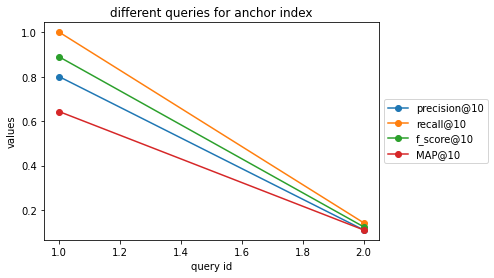

In [87]:
true_relevancy = [(1,{'question': 'python','relevance_assessments' : query_python_true_list}),(2,{'question': 'why do men have nipples','relevance_assessments' : query_nipples_true_list})]
predicted_relevancy_for_body = {1:body_search_result,2:few_body_search_result}
#print(predicted_relevancy_for_body)
predicted_relevancy_for_title = {1:title_search_result,2:few_title_search_result}
predicted_relevancy_for_anchor = {1:anchor_search_result,2:few_anchor_search_result}
#metrices_names = ['precision@k','recall@k','f_score@k','MAP@k']
metrices_names = ['precision@k','recall@k','f_score@k','MAP@k']
#k_values = [1,3,5,10,20,30,40]
k_values = [1,3,5,10]
plot_metric_different_quieries(true_relevancy,predicted_relevancy_for_anchor,metrices_names,10)


In [ ]:
#tests for us- to see that read index works, should also work on full curpos?
test_body= InvertedIndex.read_index('.', "body_index")
test_title = InvertedIndex.read_index('.', "title_index")
test_anchor = InvertedIndex.read_index('.', "anchor_index")
print(test_body.weights)
print(test_title.weights)
print(test_anchor.weights)



In [96]:

#creating body index:
# time the index creation time
#t_start = time()
#index_const_time = time() - t_start

#creating indexes- one for body, one for title and one for anchor text
#body_index = create_inverted_index_with_tf_idf_weights(body_data,"body_index")
title_index = create_inverted_index_with_binary_weights(title_data,"title_index")
#anchor_index =  create_inverted_index_with_binary_weights(anchor_data,"anchor_index")
# title_index = create_inverted_index_with_tf_idf_weights(title_data,"title_index")
print(backend_search_title_anchor("python+programming",title_index))

#get_candidate_doc_for_body(["djcfsk"],title_index)

    #docid len map
    #doc_len_map = data.Map(lambda x: calc_doc_len(x[1],x[0]))
    #print(doc_len_map)



[(23862, 2), (18942, 1), (19160, 1), (19701, 1)]
